In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
#set file paths and read in files
filepath = 'raw_data/MN_walkability.csv'
statepath = 'raw_data/state_and_county_fips_master.csv'

minnesota = pd.read_csv(filepath)
states = pd.read_csv(statepath)



In [3]:

#add leading 0's for counties
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].astype(str)
minnesota['STATEFP'] = minnesota['STATEFP'].astype(str)
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].str.zfill(3)

#concatenate state and county codes
minnesota['fips'] = minnesota['STATEFP'] + minnesota['COUNTYFP']
minnesota['fips'] = minnesota['fips'].astype('int64')
minnesota.head(10)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,fips
0,125050,125051,2.716310e+11,2.716310e+11,27,163,71003,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,18,15,8,1,8.500000,12371.721880,4.274573e+06,27163
1,125051,125052,2.716310e+11,2.716310e+11,27,163,71003,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,18,16,7,1,8.333333,7746.443532,2.872370e+06,27163
2,125052,125053,2.716310e+11,2.716310e+11,27,163,71003,3,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,15,6,9,1,6.833333,9884.396703,2.854760e+06,27163
3,125053,125054,2.716310e+11,2.716310e+11,27,163,71006,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,20,20,1,13.666667,7814.948545,3.005446e+06,27163
4,125054,125055,2.716310e+11,2.716310e+11,27,163,71006,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,18,18,1,12.666667,10906.431880,3.546875e+06,27163
5,125055,125056,2.713110e+11,2.713110e+11,27,131,70800,5,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,11,5,16,1,8.333333,3945.373100,4.936691e+05,27131
6,125056,125057,2.714500e+11,2.714500e+11,27,145,601,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,15,20,18,1,12.166667,3645.290542,5.845590e+05,27145
7,125057,125058,2.703710e+11,2.703710e+11,27,037,60904,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,20,12,1,11.000000,7146.198431,2.405088e+06,27037
8,125058,125059,2.703710e+11,2.703710e+11,27,037,60604,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,7,18,10,1,7.833333,7165.978041,2.552602e+06,27037
9,125059,125060,2.703710e+11,2.703710e+11,27,037,60817,4,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,4,11,12,1,6.833333,8984.860085,4.239370e+06,27037


In [58]:
#merge main dataset with fips codes dataset
merged_df = pd.merge(minnesota,states,on='fips')

#Choose with columns you want to view (feel free to add more!)
reduced_columns = merged_df[['GEOID20','CSA_Name','name','state','TotPop','NatWalkInd','fips','AutoOwn0', 'AutoOwn1', 'AutoOwn2p']]
reduced_columns.head(20)

,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips,AutoOwn0,AutoOwn1,AutoOwn2p
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1934,8.500000,27163,58,320,439
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,574,8.333333,27163,16,52,177
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,998,6.833333,27163,19,101,251
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2506,13.666667,27163,18,273,687
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2350,12.666667,27163,29,259,673
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,953,9.500000,27163,6,66,279
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,860,5.166667,27163,8,37,278
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1918,5.333333,27163,5,80,659
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1470,12.666667,27163,0,64,464
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1016,10.500000,27163,77,105,261


In [64]:
average_zero_cars = reduced_columns.groupby(['fips']).mean()['AutoOwn0']
County_cars = pd.DataFrame({'County Cars':average_zero_cars})
County_cars.head()

,County Cars
fips,
27001,25.647059
27003,24.174468
27005,27.535714
27007,40.303030
27009,42.571429


In [65]:
average_one_car = reduced_columns.groupby(['fips']).mean()['AutoOwn1']
County_cars1 = pd.DataFrame({'County Cars':average_one_car})
County_cars1.head()

,County Cars
fips,
27001,135.352941
27003,135.753191
27005,121.071429
27007,165.909091
27009,166.321429


In [66]:
average_two_cars = reduced_columns.groupby(['fips']).mean()['AutoOwn2p']
County_cars2 = pd.DataFrame({'County Cars':average_two_cars})
County_cars2.head()

,County Cars
fips,
27001,292.705882
27003,379.851064
27005,333.071429
27007,317.151515
27009,370.285714


In [67]:
#add buckets for walkability

for index,row in reduced_columns.iterrows():
    if reduced_columns.loc[index, "NatWalkInd"] <= 5.75:
        reduced_columns.loc[index,'Walkability_bucket'] = 'Least Walkable'
    elif reduced_columns.loc[index, "NatWalkInd"] <= 10.5:
        reduced_columns.loc[index,'Walkability_bucket'] ='Below Average Walkability'
    elif reduced_columns.loc[index, "NatWalkInd"] <= 15.25:
        reduced_columns.loc[index,'Walkability_bucket'] = 'Above Average Walkability'
    elif reduced_columns.loc[index, "NatWalkInd"] > 15.25:
        reduced_columns.loc[index,'Walkability_bucket'] = 'Most Walkable'
reduced_columns.head(20)  

/var/folders/bp/z6vmjff16_1420skmmdxhzg80000gq/T/ipykernel_56298/577720634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_columns.loc[index,'Walkability_bucket'] ='Below Average Walkability'


,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips,AutoOwn0,AutoOwn1,AutoOwn2p,Walkability_bucket
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1934,8.500000,27163,58,320,439,Below Average Walkability
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,574,8.333333,27163,16,52,177,Below Average Walkability
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,998,6.833333,27163,19,101,251,Below Average Walkability
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2506,13.666667,27163,18,273,687,Above Average Walkability
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2350,12.666667,27163,29,259,673,Above Average Walkability
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,953,9.500000,27163,6,66,279,Below Average Walkability
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,860,5.166667,27163,8,37,278,Least Walkable
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1918,5.333333,27163,5,80,659,Least Walkable
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1470,12.666667,27163,0,64,464,Above Average Walkability
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1016,10.500000,27163,77,105,261,Below Average Walkability


In [68]:
sums = reduced_columns.groupby(['fips']).sum()['TotPop']
County_sums = pd.DataFrame({'County Population':sums})
weighted_data = pd.merge(reduced_columns,County_sums,on='fips')

weighted_data['weights'] = weighted_data['TotPop'] / weighted_data['County Population']

weighted_data['weightsum'] = weighted_data['NatWalkInd'] * weighted_data['weights']
weighted_data.head()

weighted_index = pd.DataFrame({'Weighted Walk Index':weighted_data.groupby(['fips']).sum()['weightsum']})
weighted_index.sort_values('Weighted Walk Index',ascending=False)

,Weighted Walk Index
fips,
27123,12.959863
27053,12.202175
27027,10.431105
27037,9.804645
27137,9.133652
...,...
27077,4.956857
27153,4.929160
27087,4.867054


In [69]:
cars_analysis = pd.merge(weighted_index,County_cars,on='fips')
cars_analysis = cars_analysis[['Weighted Walk Index','County Cars']]
cars_analysis.head()

,Weighted Walk Index,County Cars
fips,,
27001,5.135647,25.647059
27003,8.824677,24.174468
27005,5.837864,27.535714
27007,6.016794,40.303030
27009,6.928409,42.571429


In [70]:
cars_analysis1 = pd.merge(weighted_index,County_cars1,on='fips')
cars_analysis1 = cars_analysis1[['Weighted Walk Index','County Cars']]
cars_analysis1.head()

,Weighted Walk Index,County Cars
fips,,
27001,5.135647,135.352941
27003,8.824677,135.753191
27005,5.837864,121.071429
27007,6.016794,165.909091
27009,6.928409,166.321429


In [71]:
cars_analysis2 = pd.merge(weighted_index,County_cars2,on='fips')
cars_analysis2 = cars_analysis2[['Weighted Walk Index','County Cars']]
cars_analysis2.head()

,Weighted Walk Index,County Cars
fips,,
27001,5.135647,292.705882
27003,8.824677,379.851064
27005,5.837864,333.071429
27007,6.016794,317.151515
27009,6.928409,370.285714


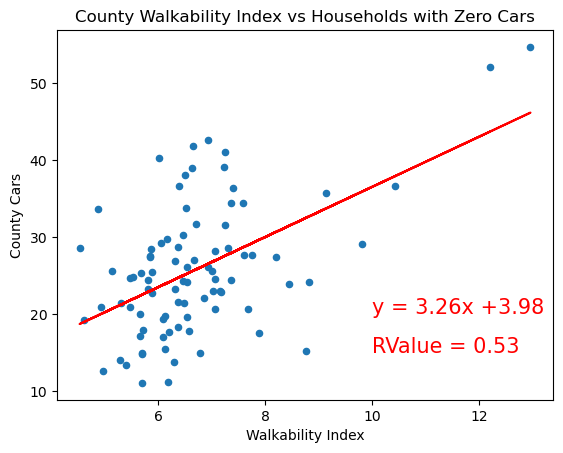

In [107]:
cars_analysis.plot(kind='scatter',x='Weighted Walk Index',y='County Cars')

(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_analysis['Weighted Walk Index'],cars_analysis['County Cars'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = cars_analysis['Weighted Walk Index'] * slope + intercept
plt.plot(cars_analysis['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(10,20),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(10,15),fontsize=15,color="red")
plt.xlabel("Walkability Index")
plt.title("County Walkability Index vs Households with Zero Cars")
plt.show()

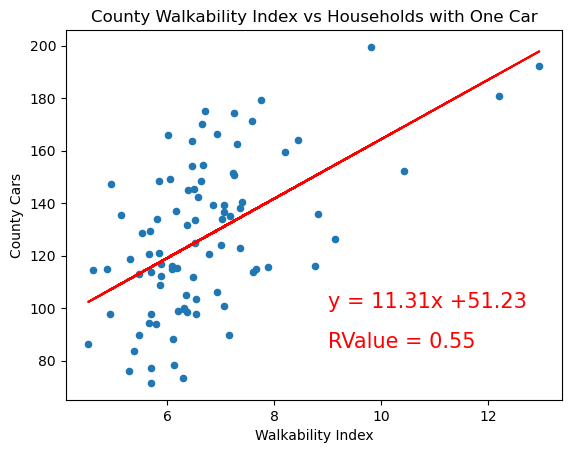

In [108]:
cars_analysis1.plot(kind='scatter',x='Weighted Walk Index',y='County Cars')

(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_analysis1['Weighted Walk Index'],cars_analysis1['County Cars'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = cars_analysis1['Weighted Walk Index'] * slope + intercept
plt.plot(cars_analysis1['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(9,100),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(9,85),fontsize=15,color="red")
plt.xlabel("Walkability Index")
plt.title("County Walkability Index vs Households with One Car")
plt.show()

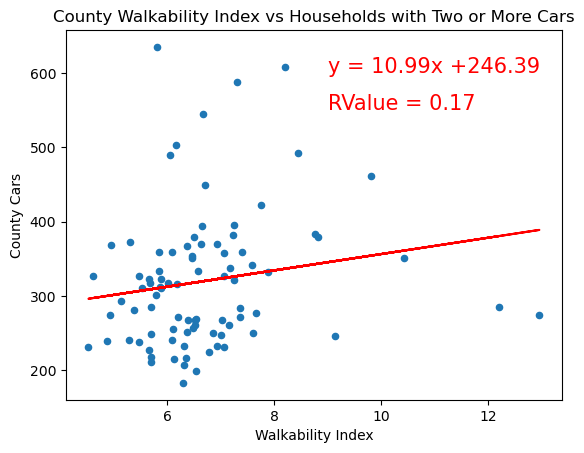

In [109]:
cars_analysis2.plot(kind='scatter',x='Weighted Walk Index',y='County Cars')

(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_analysis2['Weighted Walk Index'],cars_analysis2['County Cars'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = cars_analysis2['Weighted Walk Index'] * slope + intercept
plt.plot(cars_analysis2['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(9,600),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(9,550),fontsize=15,color="red")
plt.xlabel("Walkability Index")
plt.title("County Walkability Index vs Households with Two or More Cars")
plt.show()